In [7]:
%matplotlib inline
from darkflow.net.build import TFNet
import cv2

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io
import numpy as np

In [9]:
options = {"model": "cfg/yolo.cfg", "load": "weights/yolo.weights", "threshold": 0.4}

tfnet = TFNet(options)

Parsing ./cfg/weights/yolo.cfg
Parsing cfg/yolo.cfg
Loading weights/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.0400547981262207s
Model has a coco model name, loading coco labels.


In [10]:
results = []
imgpath="./test/test1"
imageList=[]
import os
for root, dirs, files in os.walk(imgpath, topdown=False):
       for name in files:
                mystr=root+"/"+name
                imageList.append(mystr)
                
#print(imageList)             
images = []


for image_path in imageList:
    images.append(io.imread(image_path))
    results.append(tfnet.return_predict(images[len(images)-1]))

Accuracy 67.27597713470459
Precision 0.6


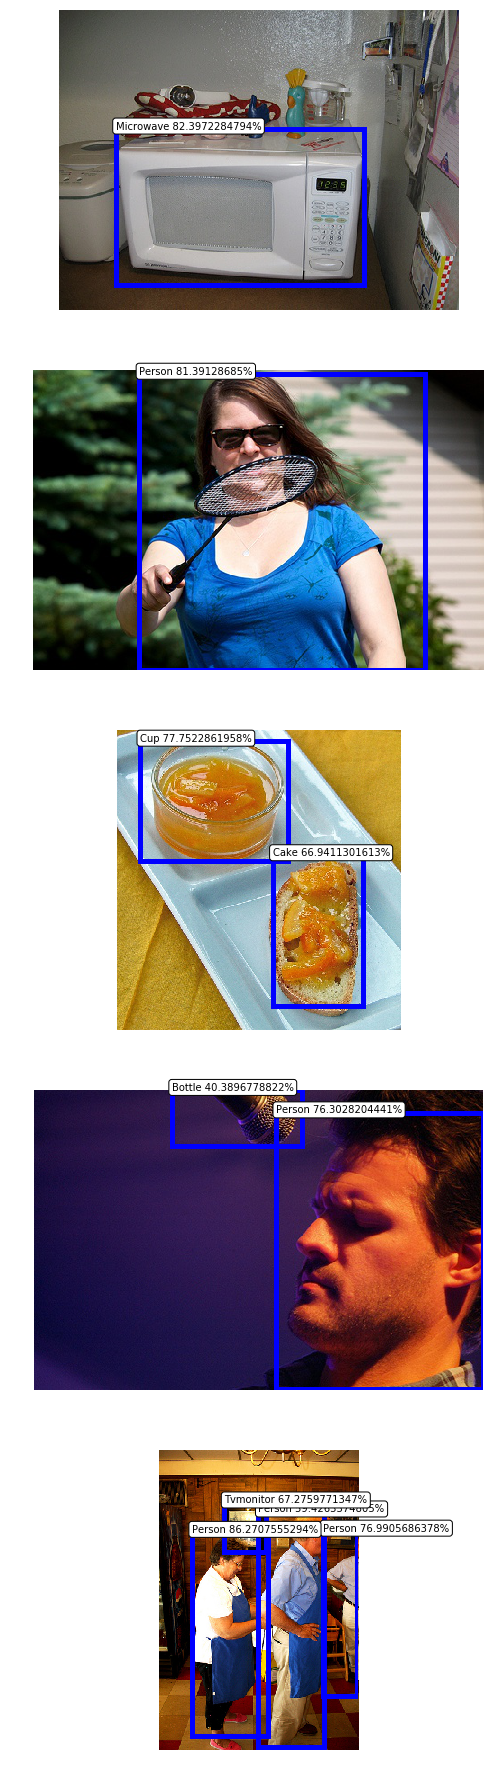

In [12]:
# Mostramos las imagenes resultantes
import numpy as np
fig, axes = plt.subplots(nrows=len(imageList), figsize=(32, 32))
global str
TP=FP=0
for result, ax, img in zip(results, axes, images):    
    ax.imshow(img)
    ax.axis('off')
    for label in result:
        topleft = label['topleft']
        bottomright = label['bottomright']

        height = bottomright['y'] - topleft['y']
        width = bottomright['x'] - topleft['x']

        coord = [topleft['x'], topleft['y'], width, height]

        #ax.add_patch(plt.Rectangle((topleft['x'], topleft['y']), width, height, edgecolor='red',
                                   #alpha=0.3, lw=2, facecolor='none',linewidth=7))
        ax.add_patch(patches.Rectangle((topleft['x'], topleft['y']), width, height, edgecolor='blue',
                                    facecolor='none',linewidth=5))
        str1 = label['label']
        str2 = str(label['confidence']*100)
        confidence=np.empty(1,)
        np.append(confidence,label['confidence'])
        if(label['confidence']>0.75):
            TP+=1;
        else:
            FP+=1;
        
        
        str3 = str1 + " " +str2 + "%" 
        ax.annotate(str3.capitalize(), xy=(topleft['x'], topleft['y']), xytext=(topleft['x'], topleft['y']),bbox=dict(boxstyle="round", fc="w"))

print("Accuracy {}".format(np.mean(confidence)))
precision=(TP)/(TP+FP)
print("Precision {}".format(precision))

In [ ]:

print(results[0])